# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

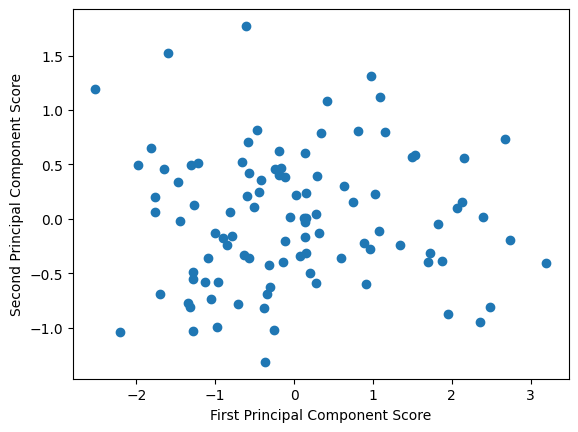

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

In [11]:
#Looking at the outliers in the upper left corner of the graph:

#1) Their first principal component scores are low (negative values), while their second principal component scores are high (positive values).

#2) What this tells us about their original data values:

#- **Series_3**: These points likely have unusually high values in series_3 relative to their values in series_1 and series_2. The second principal component heavily weights series_3 (with a positive coefficient of about 0.92), so high PC2 scores strongly indicate high series_3 values.

#- **Series_1 and Series_2**: It's difficult to determine anything specific about series_1 and series_2 values for these outliers because:
 # - Both series have similar negative weights in the second principal component (around -0.33 and -0.22)
  #- Both series have similar positive weights in the first principal component (around 0.58 and 0.57)

#3) Why it's challenging to distinguish between series_1 and series_2:

#This difficulty stems from the data generation process itself. Series_1 and series_2 are highly correlated by design.

#The correlation between series_1 and series_2 is very strong because the noise term has a small standard deviation (0.1). This means they essentially provide redundant information, so the PCA algorithm treats them as nearly the same variable. They contribute almost identically to both principal components, making them nearly indistinguishable in the PCA space.

#In contrast, series_3 has much more independent variation (with noise scale of 0.5), allowing it to be clearly distinguished by the second principal component.

#This is actually a perfect illustration of one of PCA's key strengths - identifying redundant information in your dataset. The first principal component essentially captures the common trend across all three series, while the second component primarily highlights where series_3 diverges from the other two.

In [12]:
# Advantages of the PCA Graph

#1. **Dimensionality Reduction**: The plot reduces three dimensions (series_1, series_2, series_3) to two dimensions while preserving most of the variance, making visualization possible.

#2. **Pattern Identification**: It clearly reveals the outliers and their characteristics, showing which points deviate from the typical pattern in the dataset.

#3. **Variable Correlation Visualization**: The graph implicitly demonstrates the strong correlation between series_1 and series_2 by how they're represented similarly in the principal components.

#4. **Variance Explanation**: It shows which directions in the data contain the most information - the first principal component captures the largest share of variance.

#5. **Anomaly Detection**: The outliers in the upper left corner are immediately visible, highlighting potential anomalies that might require further investigation.

# Disadvantages of the PCA Graph

#1. **Interpretability Challenges**: The axes represent abstract combinations of the original variables, making direct interpretation less intuitive than plotting the original variables.

#2. **Information Loss**: Some variance (though minor) is discarded when projecting to two dimensions, potentially hiding some patterns in the data.

#3. **Similar Variable Confusion**: As we discussed, it's nearly impossible to distinguish the contributions of series_1 and series_2 because they're so highly correlated.

#4. **Scale Sensitivity**: PCA is sensitive to the scale of the input variables. If the series were on different scales and not centered (as done in your code), the results could be misleading.

#5. **Linearity Limitation**: PCA only captures linear relationships between variables. If there were non-linear relationships in your data, they wouldn't be properly represented.

#6. **No Clear Groups**: Unlike some other dimensionality reduction techniques (like t-SNE), PCA doesn't necessarily separate distinct clusters well if they exist in the data.

#The primary trade-off is between simplification (which aids visualization and analysis) and the loss of direct interpretability in terms of the original variables.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

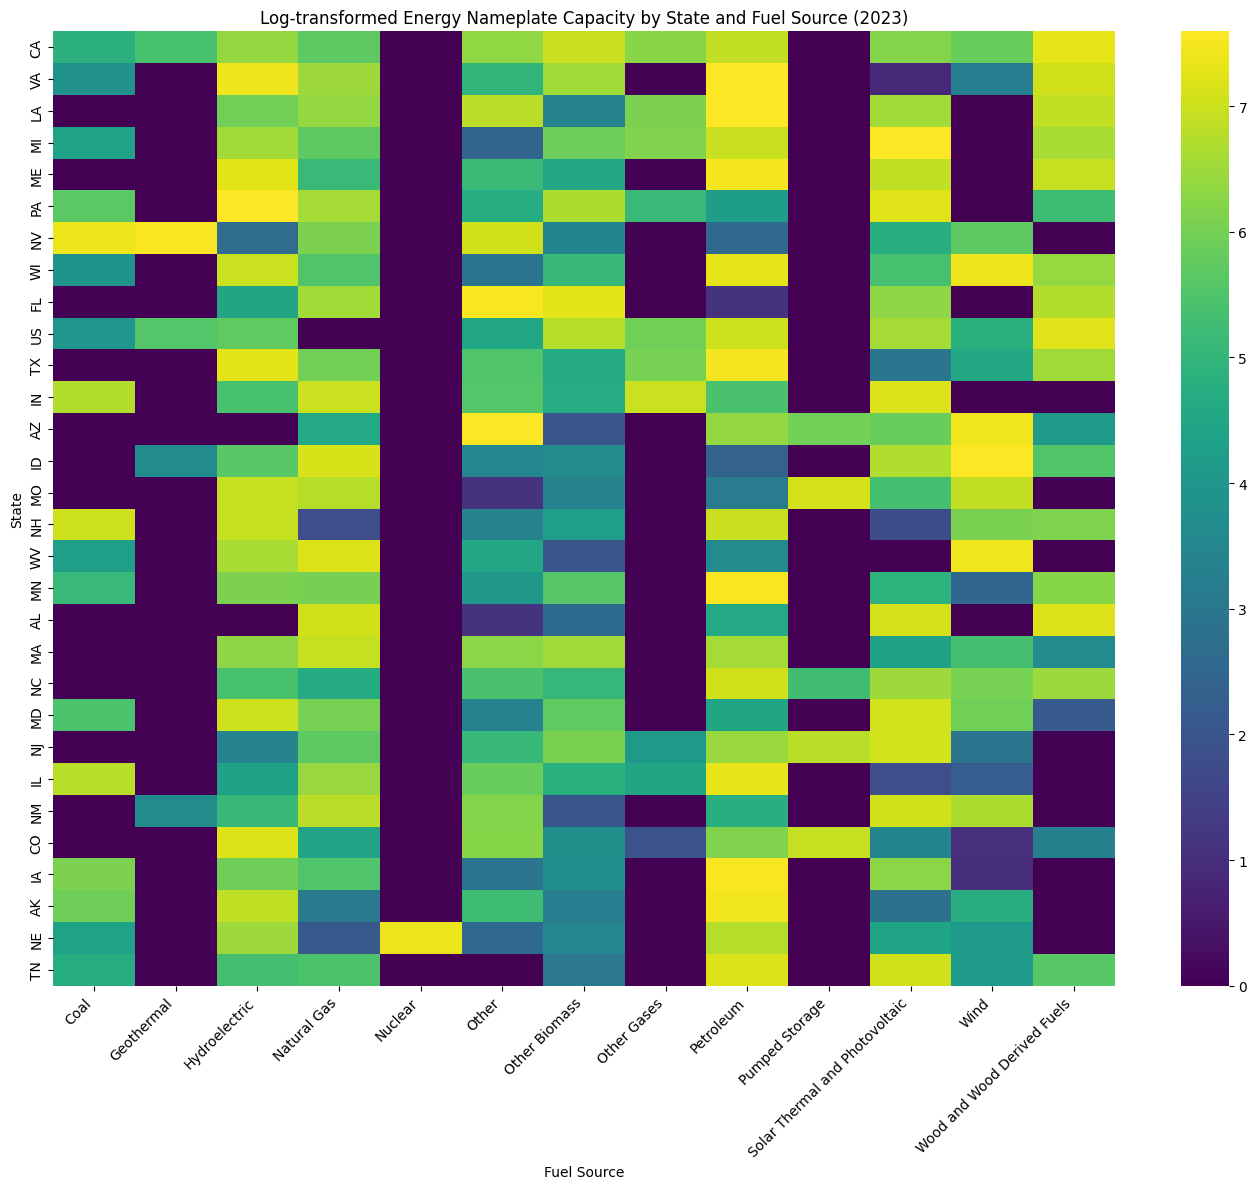

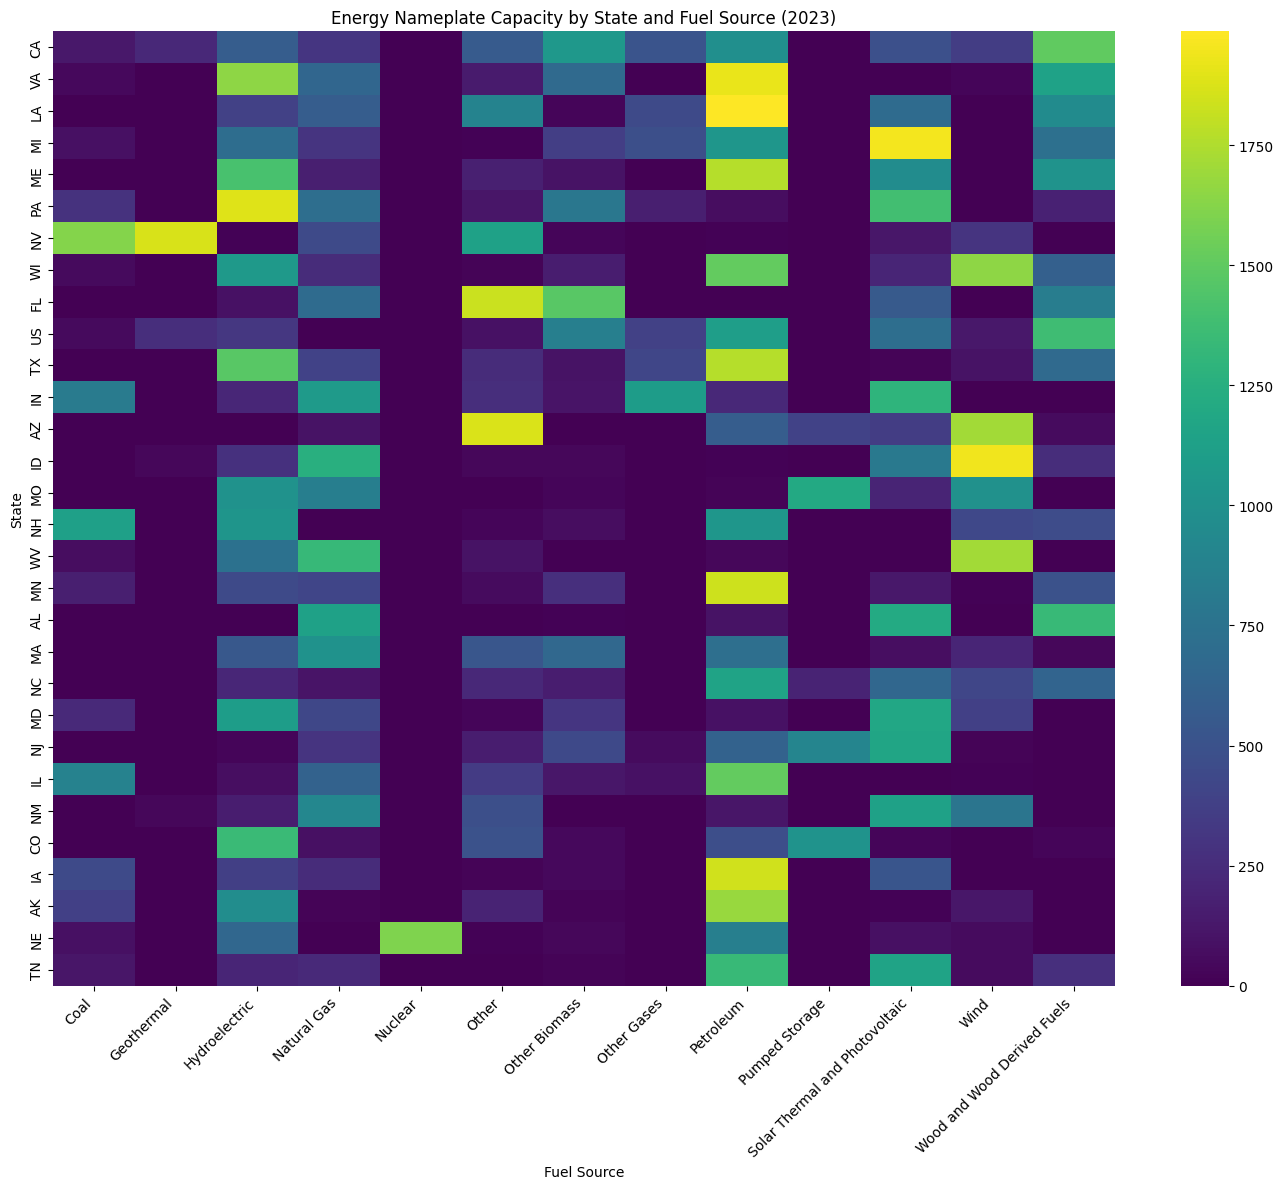

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('StateEnergyData.csv', skiprows=1)

# Clean the column names (remove any whitespace)
df.columns = df.columns.str.strip()

# Filter out 'All Sources' to avoid double-counting
df = df[df['FuelSource'] != 'All Sources']

# Convert data types
df['Nameplate_Capacity_(Megawatts)'] = pd.to_numeric(df['Nameplate_Capacity_(Megawatts)'], errors='coerce')
df['Summer_Capacity_(Megawatts)'] = pd.to_numeric(df['Summer_Capacity_(Megawatts)'], errors='coerce')

# Create a pivot table for the heatmap: States vs. Fuel Sources (using most recent year)
recent_year = df['Year'].max()
recent_data = df[df['Year'] == recent_year]

# Aggregate the data by state and fuel source
heatmap_data = recent_data.pivot_table(
    index='State', 
    columns='FuelSource', 
    values='Nameplate_Capacity_(Megawatts)',
    aggfunc='sum',
    fill_value=0
)

# Drop null column if it exists
if None in heatmap_data.columns:
    heatmap_data = heatmap_data.drop(None, axis=1)

# Filter to top 30 states by total capacity to make the heatmap more readable
top_states = heatmap_data.sum(axis=1).nlargest(30).index
heatmap_data = heatmap_data.loc[top_states]

# Apply log transformation to handle the wide range of values
heatmap_data_log = np.log1p(heatmap_data)  # log(1+x) to handle zeros

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data_log, cmap='viridis', annot=False, fmt='.0f')
plt.title(f'Log-transformed Energy Nameplate Capacity by State and Fuel Source ({recent_year})')
plt.xlabel('Fuel Source')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('state_energy_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a non-log version for comparison
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='.0f')
plt.title(f'Energy Nameplate Capacity by State and Fuel Source ({recent_year})')
plt.xlabel('Fuel Source')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('state_energy_heatmap_raw.png', dpi=300, bbox_inches='tight')
plt.show()

Shape of data for PCA: (52, 13)
Features (energy sources): Coal, Geothermal, Hydroelectric, Natural Gas, Nuclear, Other, Other Biomass, Other Gases, Petroleum, Pumped Storage, Solar Thermal and Photovoltaic, Wind, Wood and Wood Derived Fuels

Variance explained by each principal component:
PC1: 0.1596 (0.1596 cumulative)
PC2: 0.1354 (0.2950 cumulative)
PC3: 0.1154 (0.4104 cumulative)
PC4: 0.1036 (0.5140 cumulative)
PC5: 0.0851 (0.5991 cumulative)
PC6: 0.0801 (0.6792 cumulative)
PC7: 0.0720 (0.7512 cumulative)
PC8: 0.0651 (0.8163 cumulative)
PC9: 0.0538 (0.8701 cumulative)
PC10: 0.0431 (0.9132 cumulative)
PC11: 0.0348 (0.9481 cumulative)
PC12: 0.0309 (0.9790 cumulative)
PC13: 0.0210 (1.0000 cumulative)


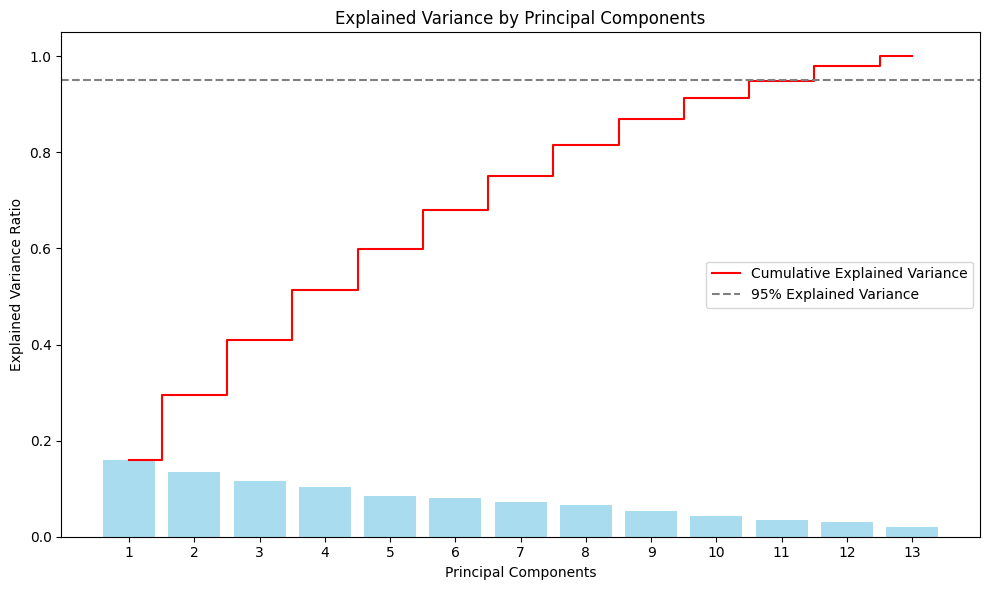


Variance captured by the first principal component (PC1): 0.1596 or 15.96%

Feature loadings for PC1 (showing the contribution of each energy source):
                                 Loading
FuelSource                              
Wood and Wood Derived Fuels     0.520433
Other Biomass                   0.438879
Other Gases                     0.372869
Petroleum                       0.354517
Solar Thermal and Photovoltaic  0.255380
Hydroelectric                   0.151324
Other                           0.077964
Natural Gas                    -0.047984
Nuclear                        -0.067159
Geothermal                     -0.141567
Coal                           -0.172352
Pumped Storage                 -0.205690
Wind                           -0.280636


/tmp/ipykernel_5257/1442993501.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings.index, y='Loading', data=loadings, palette='viridis')


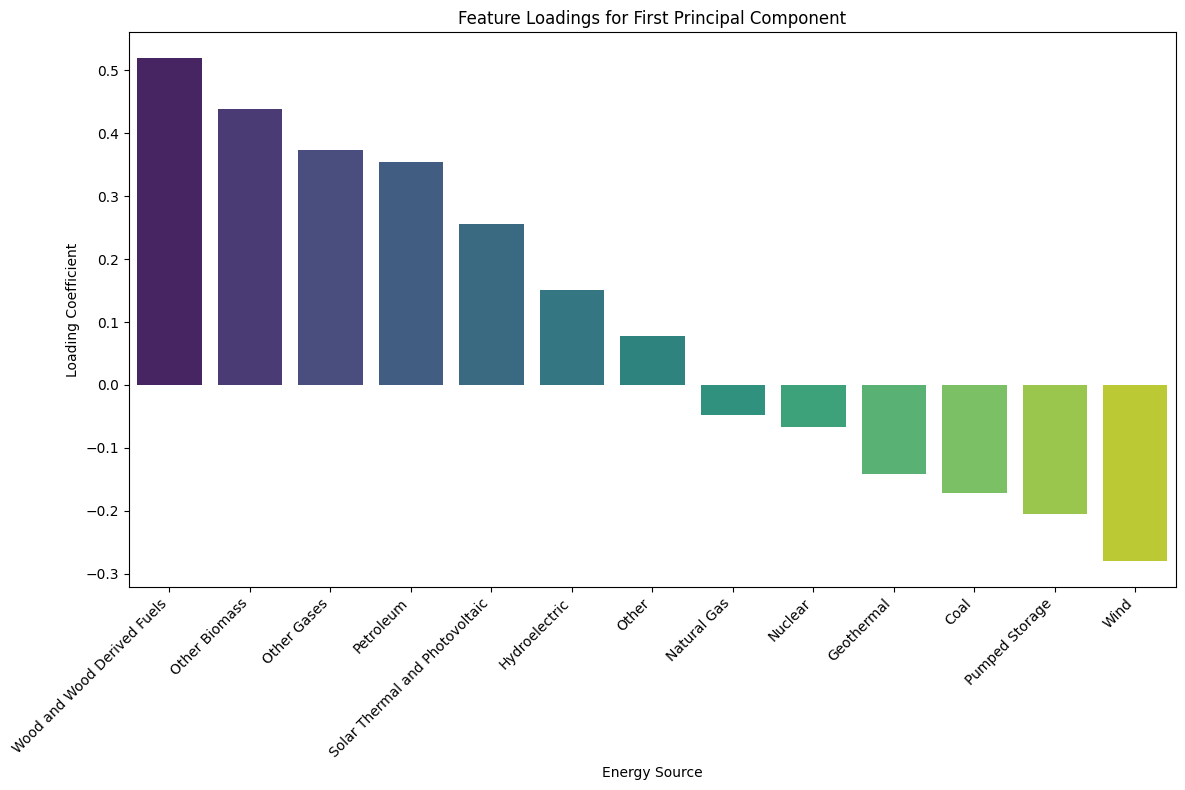


Top 10 states by PC1 projection:
   State       PC1
4     CA  3.718765
44    US  3.213299
22    MI  2.786864
46    VA  2.602220
9     FL  2.499719
18    LA  2.475679
21    ME  2.067919
43    TX  1.881057
38    PA  1.572950
15    IN  1.375008

Bottom 10 states by PC1 projection:
   State       PC1
7     DC -1.118048
26    MT -1.152858
48    WA -1.367011
41    SD -1.415258
45    UT -1.483394
3     AZ -1.527577
13    ID -1.571837
50    WV -2.065110
24    MO -2.313622
33    NV -2.793122


/tmp/ipykernel_5257/1442993501.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='PC1', y='State', data=pc1_projection, palette='coolwarm')


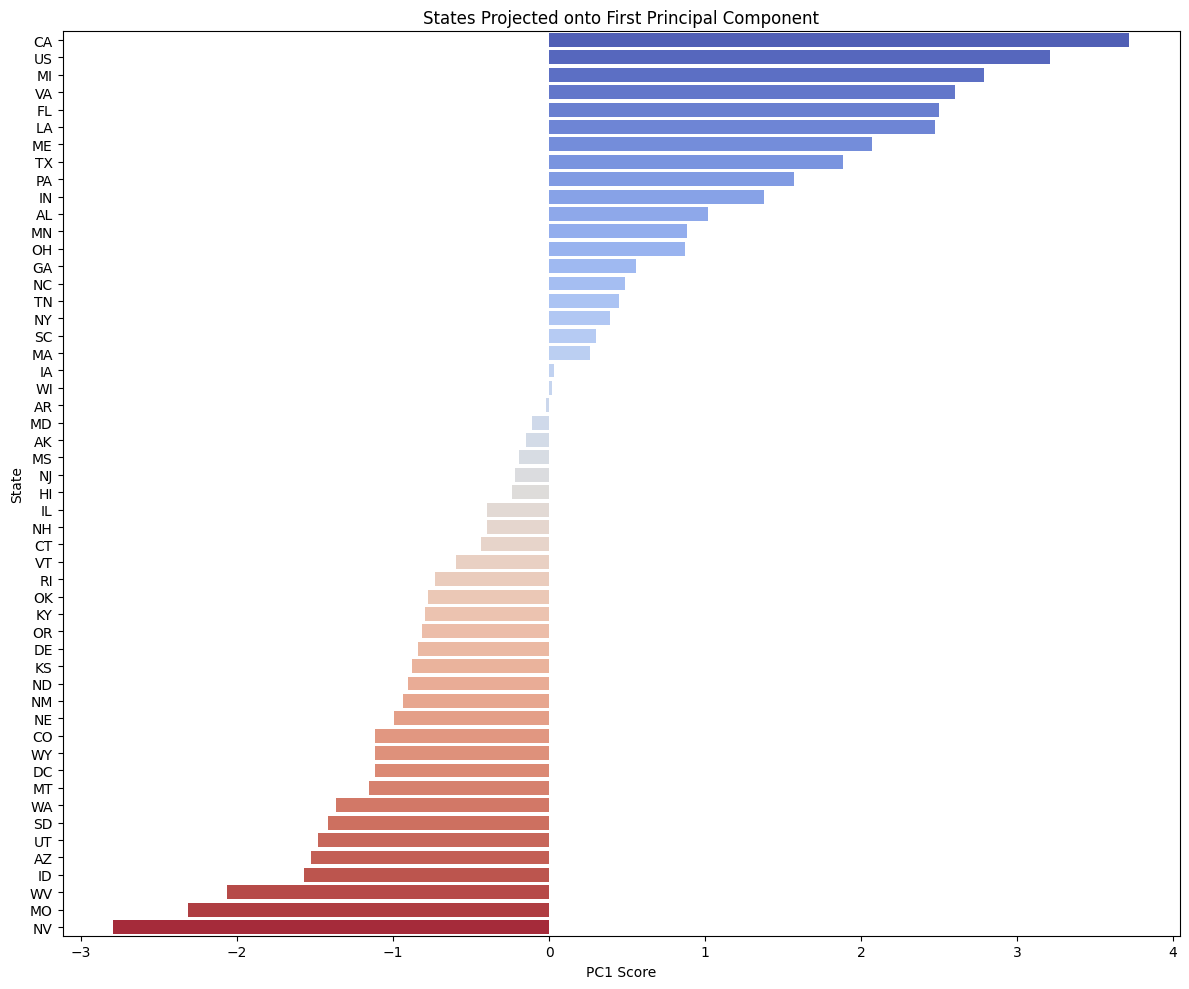


Mean Squared Error for reconstruction using only PC1: 141963.94


<Figure size 1200x800 with 0 Axes>

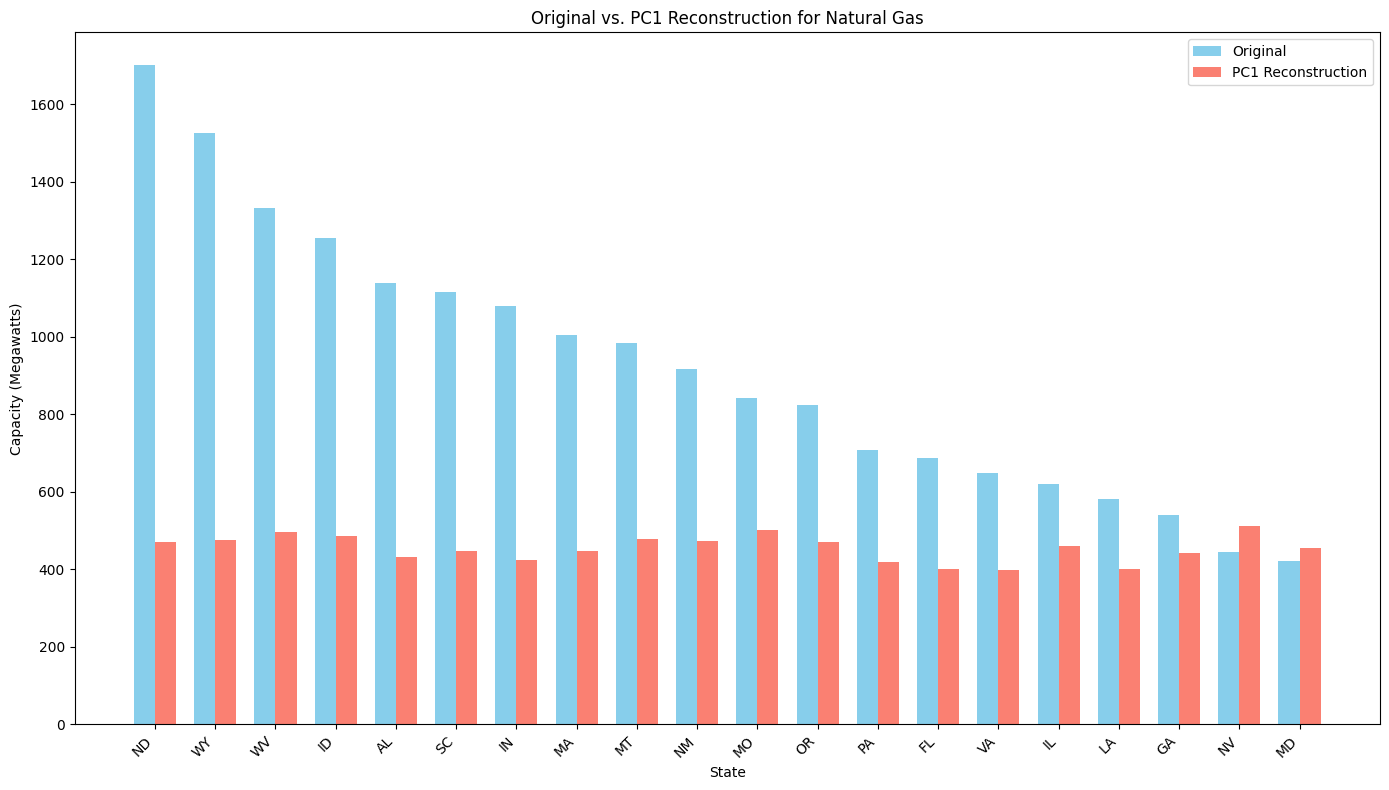

<Figure size 1200x800 with 0 Axes>

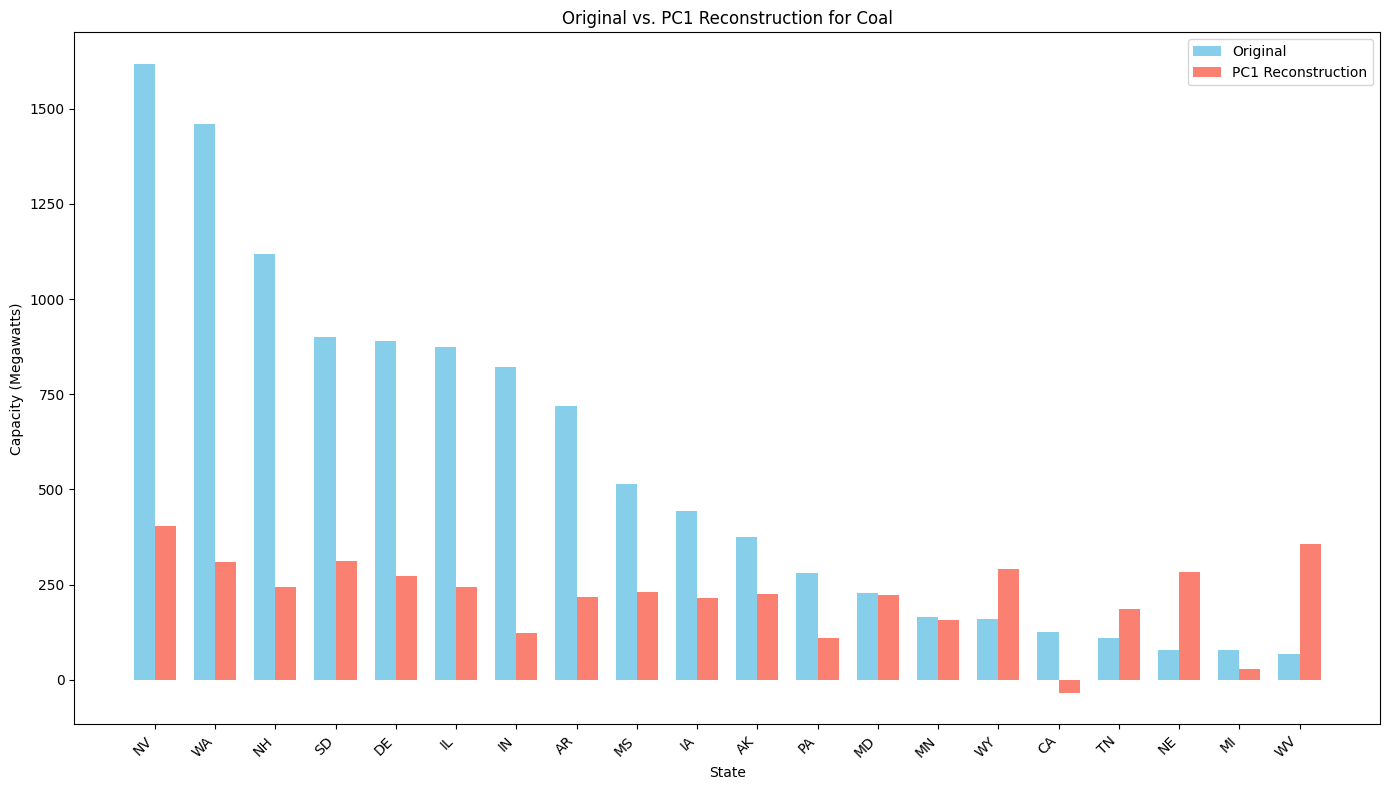

<Figure size 1200x800 with 0 Axes>

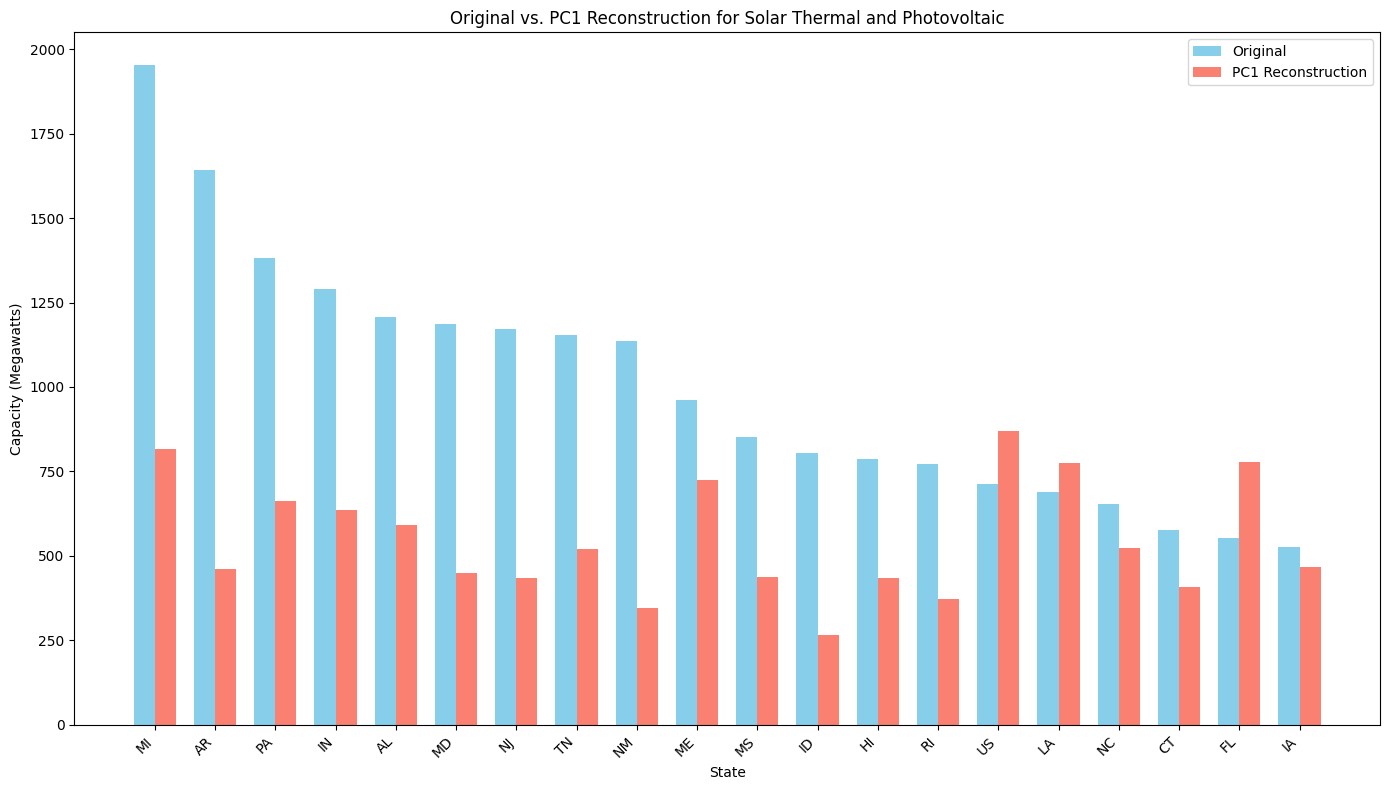

<Figure size 1200x800 with 0 Axes>

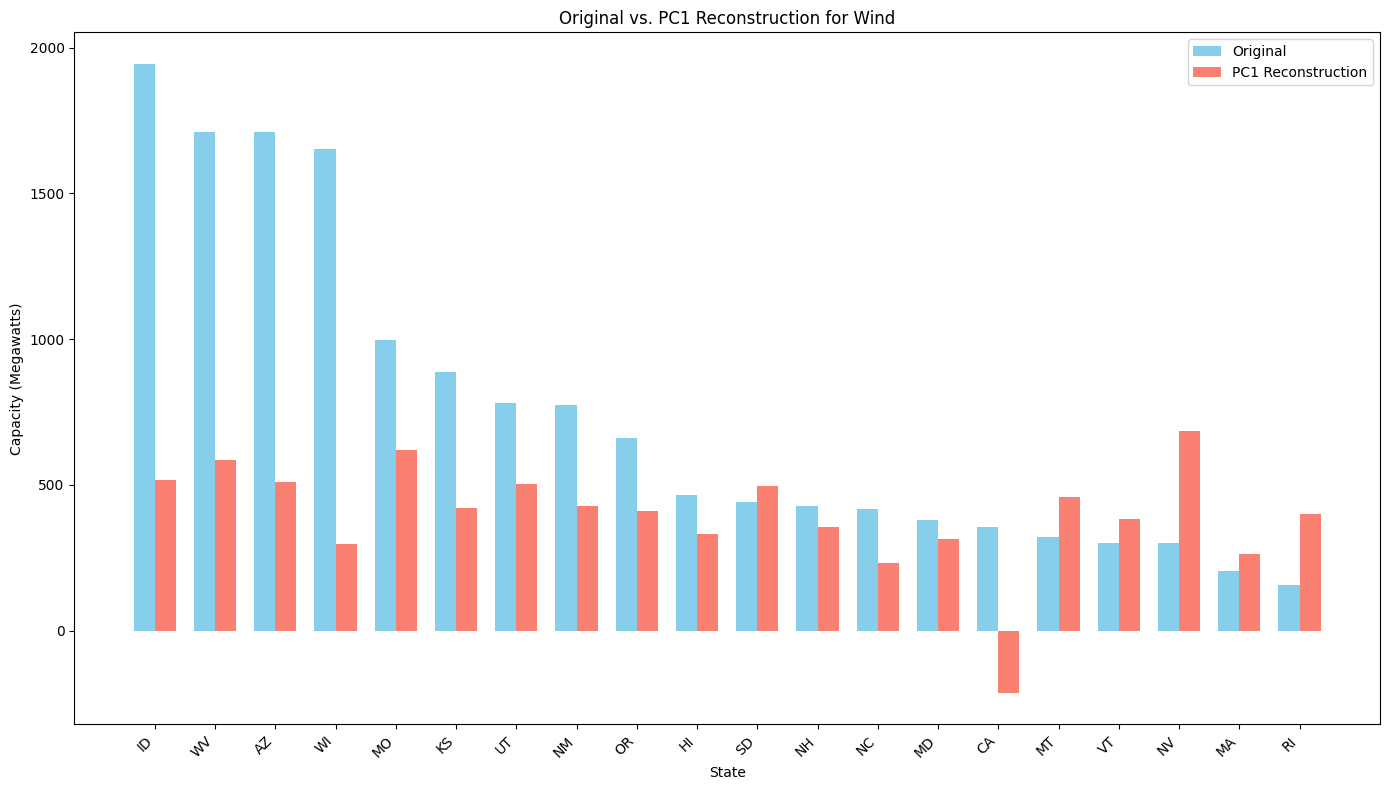

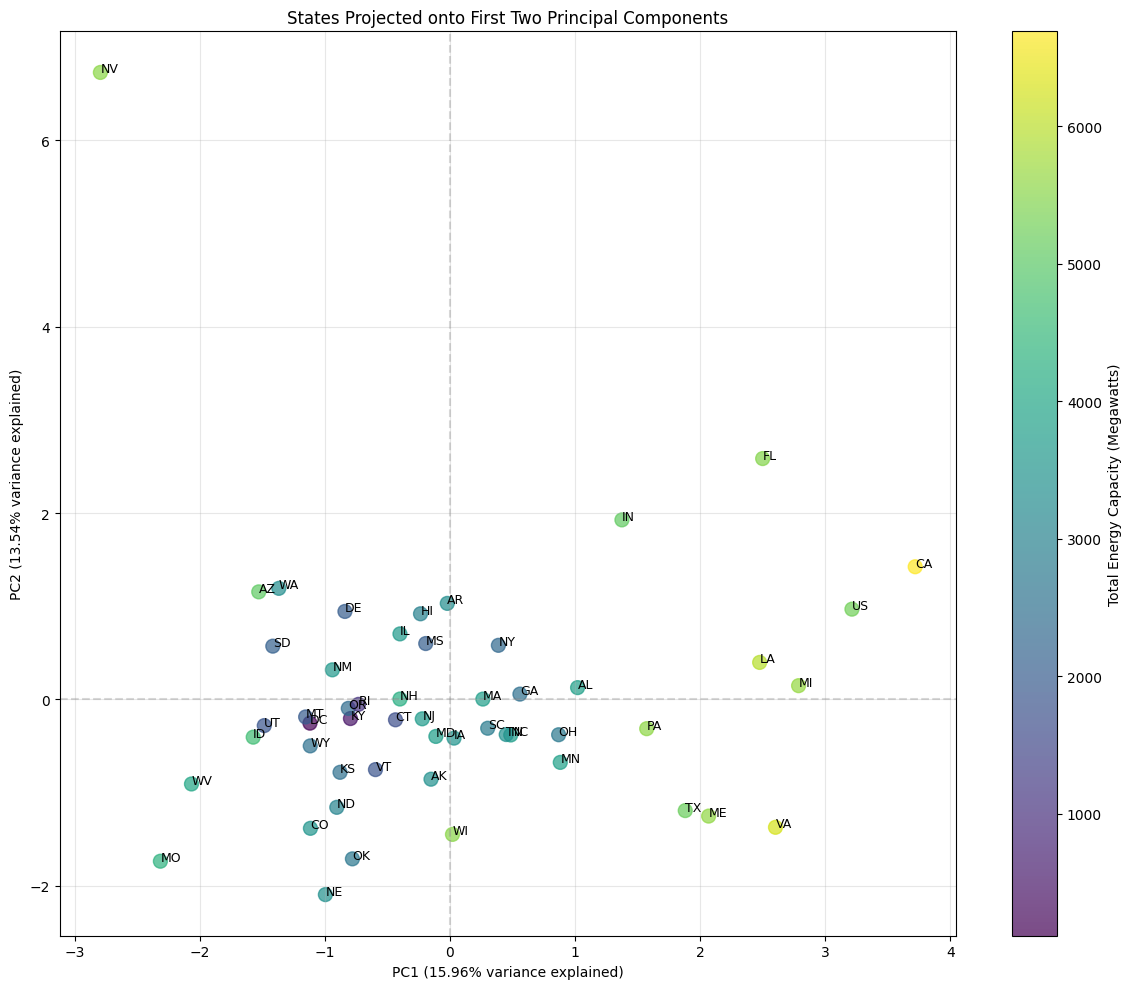

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('StateEnergyData.csv', skiprows=1)

# Clean the column names
df.columns = df.columns.str.strip()

# Filter out 'All Sources' to avoid double-counting
df = df[df['FuelSource'] != 'All Sources']

# Convert data types
df['Nameplate_Capacity_(Megawatts)'] = pd.to_numeric(df['Nameplate_Capacity_(Megawatts)'], errors='coerce')
df['Summer_Capacity_(Megawatts)'] = pd.to_numeric(df['Summer_Capacity_(Megawatts)'], errors='coerce')

# Use the most recent year for PCA
recent_year = df['Year'].max()
recent_data = df[df['Year'] == recent_year]

# Create a pivot table: States vs Energy Sources
pca_data = recent_data.pivot_table(
    index='State',
    columns='FuelSource',
    values='Nameplate_Capacity_(Megawatts)',
    aggfunc='sum',
    fill_value=0
)

# Drop null column if it exists
if None in pca_data.columns:
    pca_data = pca_data.drop(None, axis=1)

# Print information about the prepared data
print(f"Shape of data for PCA: {pca_data.shape}")
print(f"Features (energy sources): {', '.join(pca_data.columns)}")

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print variance explained by each component
print("\nVariance explained by each principal component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulative)")

# Plot the explained variance
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.axhline(y=0.95, color='gray', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.tight_layout()
plt.savefig('pca_explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# Focus on the first principal component (PC1)
pc1_variance = explained_variance[0]
print(f"\nVariance captured by the first principal component (PC1): {pc1_variance:.4f} or {pc1_variance*100:.2f}%")

# Get the feature loadings for PC1
loadings = pd.DataFrame(
    pca.components_[0],
    index=pca_data.columns,
    columns=['Loading']
).sort_values('Loading', ascending=False)

print("\nFeature loadings for PC1 (showing the contribution of each energy source):")
print(loadings)

# Plot the loadings
plt.figure(figsize=(12, 8))
sns.barplot(x=loadings.index, y='Loading', data=loadings, palette='viridis')
plt.title('Feature Loadings for First Principal Component')
plt.xlabel('Energy Source')
plt.ylabel('Loading Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pc1_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

# Project data onto the first principal component
pc1_projection = pd.DataFrame({
    'State': pca_data.index,
    'PC1': principal_components[:, 0]
}).sort_values('PC1', ascending=False)

print("\nTop 10 states by PC1 projection:")
print(pc1_projection.head(10))

print("\nBottom 10 states by PC1 projection:")
print(pc1_projection.tail(10))

# Plot the projection onto PC1
plt.figure(figsize=(12, 10))
bars = sns.barplot(x='PC1', y='State', data=pc1_projection, palette='coolwarm')
plt.title('States Projected onto First Principal Component')
plt.xlabel('PC1 Score')
plt.ylabel('State')
plt.tight_layout()
plt.savefig('states_pc1_projection.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the reconstruction using only PC1
reconstructed_data = np.outer(principal_components[:, 0], pca.components_[0])
# Inverse transform to get back to original scale
reconstructed_original = scaler.inverse_transform(reconstructed_data)
reconstructed_df = pd.DataFrame(reconstructed_original, index=pca_data.index, columns=pca_data.columns)

# Calculate error in reconstruction
mse = np.mean((pca_data.values - reconstructed_df.values) ** 2)
print(f"\nMean Squared Error for reconstruction using only PC1: {mse:.2f}")

# Compare original vs. reconstructed for some energy sources
for source in ['Natural Gas', 'Coal', 'Solar Thermal and Photovoltaic', 'Wind']:
    if source in pca_data.columns:
        plt.figure(figsize=(12, 8))
        
        # Create a dataframe for the comparison
        compare_df = pd.DataFrame({
            'Original': pca_data[source],
            'Reconstructed': reconstructed_df[source],
            'State': pca_data.index
        }).sort_values('Original', ascending=False).head(20)  # Top 20 states
        
        # Plot
        plt.figure(figsize=(14, 8))
        x = np.arange(len(compare_df))
        width = 0.35
        
        plt.bar(x - width/2, compare_df['Original'], width, label='Original', color='skyblue')
        plt.bar(x + width/2, compare_df['Reconstructed'], width, label='PC1 Reconstruction', color='salmon')
        
        plt.xlabel('State')
        plt.ylabel('Capacity (Megawatts)')
        plt.title(f'Original vs. PC1 Reconstruction for {source}')
        plt.xticks(x, compare_df['State'], rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'pc1_reconstruction_{source.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
        plt.show()

# Create a scatter plot of states in the PC1-PC2 plane
if principal_components.shape[1] >= 2:
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(
        principal_components[:, 0], 
        principal_components[:, 1],
        c=pca_data.sum(axis=1),  # Color by total capacity
        cmap='viridis',
        s=100,
        alpha=0.7
    )
    
    # Add state labels
    for i, state in enumerate(pca_data.index):
        plt.annotate(
            state, 
            (principal_components[i, 0], principal_components[i, 1]),
            fontsize=9
        )
    
    plt.colorbar(scatter, label='Total Energy Capacity (Megawatts)')
    plt.title('States Projected onto First Two Principal Components')
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance explained)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance explained)')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('pca_states_2d.png', dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
#When we represent data using only its projection onto the first principal component dimension:
#1)reduce the dimensionality from multiple energy sources to just one dimension
#2)preserve the most significant patterns in the data
#3)lose some information about more nuanced relationship
#the variance captured depend on how correlated the different energy sources are. If most stats follow similar patterns
#for exmple having proportionally similar mixes of energy sources) PC1 will capture more variance.
#If states have very different energy profiles, PC1 will capture less variance.
#The PCA will:
#a)print the exact percentage of variance explained by PC1
#b)show which energy sources contribute most to PC1
#c)quantify the recontstruction error when using only PC1
#d)visualize how well the PC1 reconstruction matches the original data.

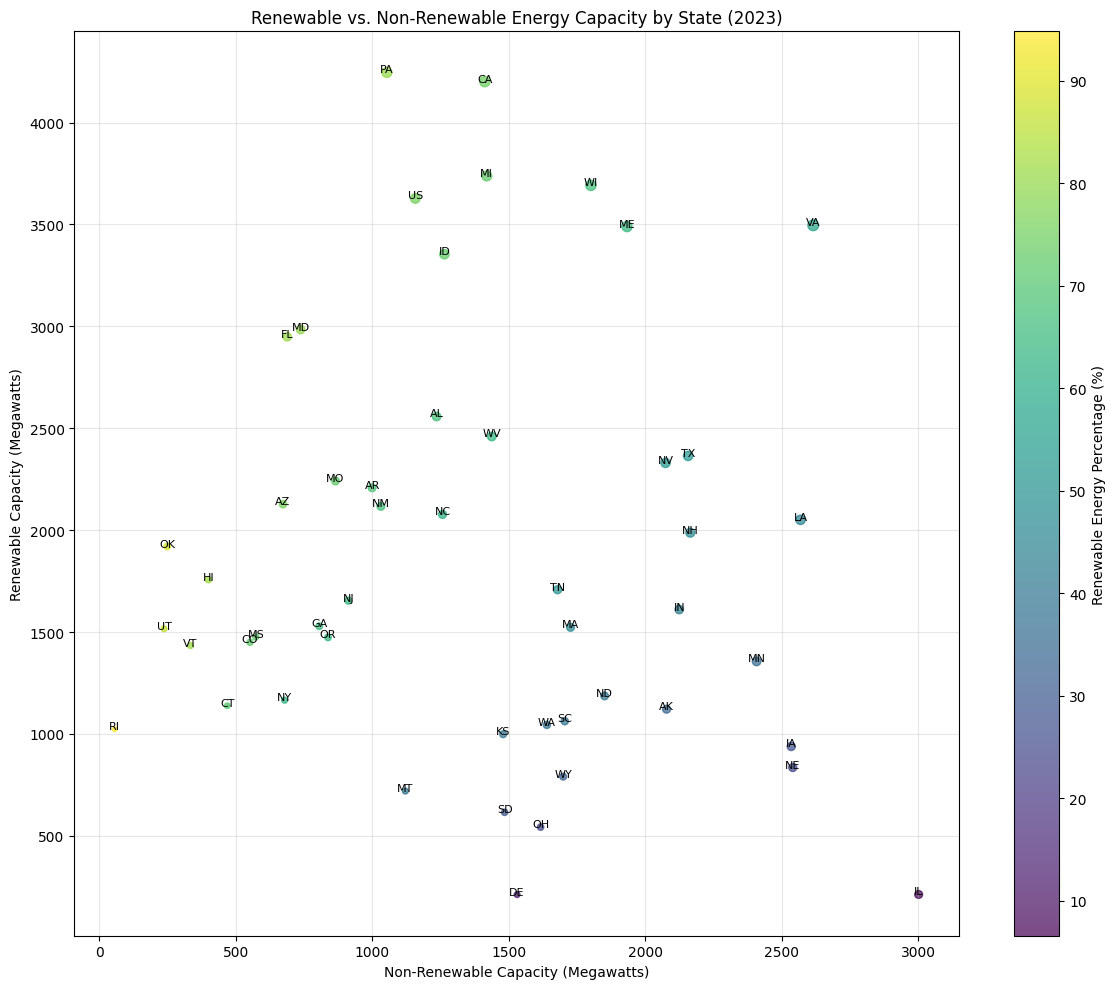

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


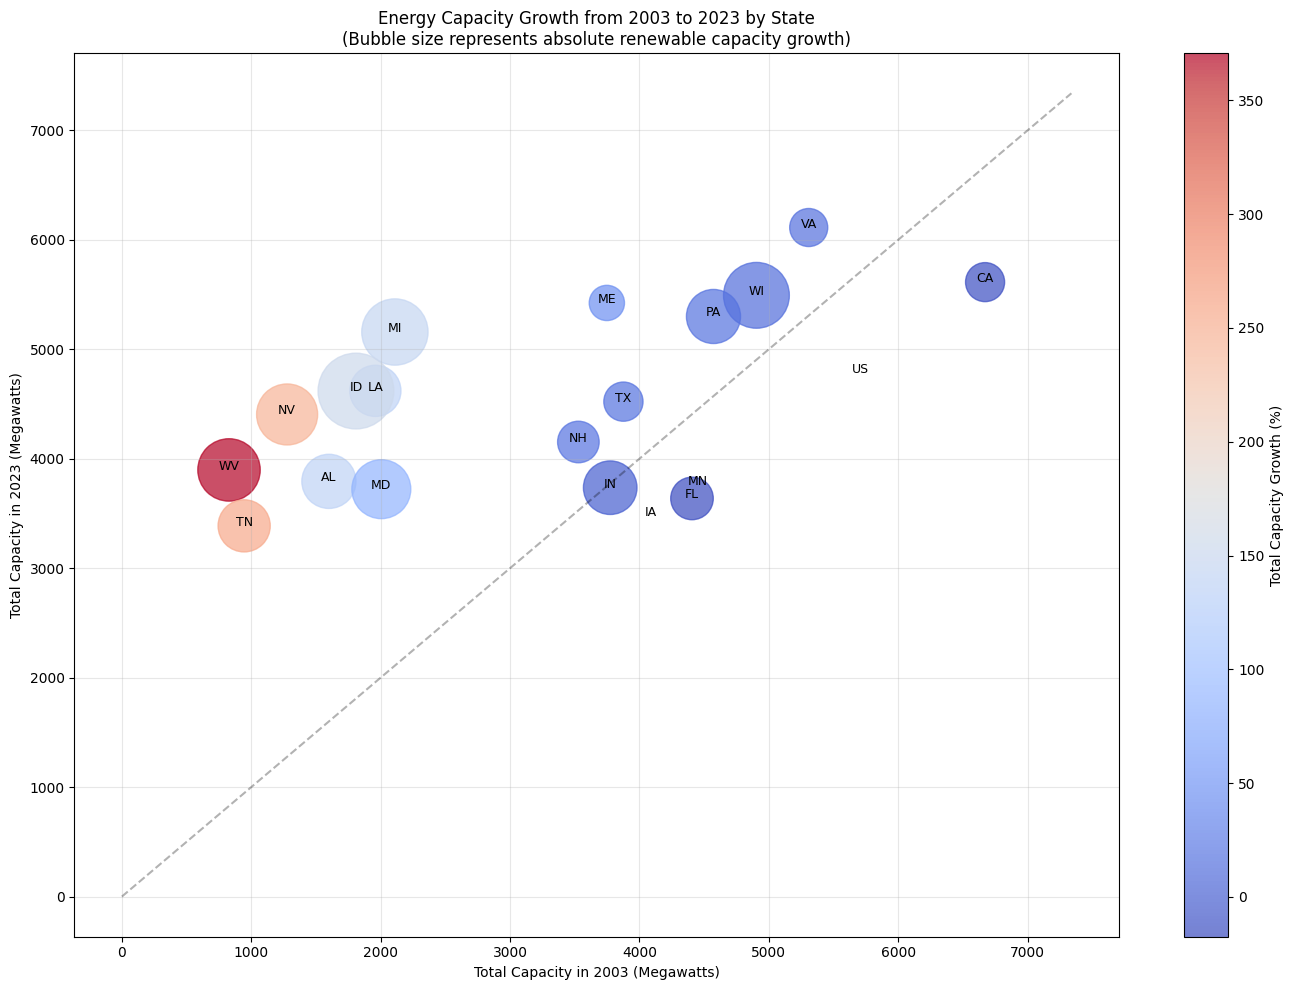

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

# Load the data
df = pd.read_csv('StateEnergyData.csv', skiprows=1)

# Clean the column names
df.columns = df.columns.str.strip()

# Filter out 'All Sources' to avoid double-counting
df = df[df['FuelSource'] != 'All Sources']

# Convert data types
df['Nameplate_Capacity_(Megawatts)'] = pd.to_numeric(df['Nameplate_Capacity_(Megawatts)'], errors='coerce')
df['Summer_Capacity_(Megawatts)'] = pd.to_numeric(df['Summer_Capacity_(Megawatts)'], errors='coerce')

# Select the most recent year
recent_year = df['Year'].max()
recent_data = df[df['Year'] == recent_year]

# Define renewable and non-renewable fuel sources
renewable_sources = ['Solar Thermal and Photovoltaic', 'Wind', 'Hydroelectric', 
                     'Geothermal', 'Wood and Wood Derived Fuels', 'Other Biomass']
non_renewable_sources = ['Coal', 'Natural Gas', 'Nuclear', 'Petroleum']

# Group by state and fuel source type
renewable_capacity = recent_data[recent_data['FuelSource'].isin(renewable_sources)].groupby('State')['Nameplate_Capacity_(Megawatts)'].sum()
non_renewable_capacity = recent_data[recent_data['FuelSource'].isin(non_renewable_sources)].groupby('State')['Nameplate_Capacity_(Megawatts)'].sum()

# Create a dataframe for the bubble plot
bubble_df = pd.DataFrame({
    'Renewable_Capacity': renewable_capacity,
    'Non_Renewable_Capacity': non_renewable_capacity,
    'Total_Capacity': renewable_capacity + non_renewable_capacity
})

# Calculate the percentage of renewable energy
bubble_df['Renewable_Percentage'] = (bubble_df['Renewable_Capacity'] / bubble_df['Total_Capacity'] * 100).round(1)

# Filter to states with significant capacity for better visualization
min_capacity = 1000  # Megawatts
bubble_df = bubble_df[bubble_df['Total_Capacity'] > min_capacity]

# Create the bubble plot - explicitly get axis object
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(
    bubble_df['Non_Renewable_Capacity'],
    bubble_df['Renewable_Capacity'],
    s=bubble_df['Total_Capacity'] / 100,  # Scale down for better visibility
    c=bubble_df['Renewable_Percentage'],
    cmap='viridis',
    alpha=0.7
)

# Add state labels to the bubbles
for state in bubble_df.index:
    ax.annotate(
        state, 
        (bubble_df.loc[state, 'Non_Renewable_Capacity'], bubble_df.loc[state, 'Renewable_Capacity']),
        fontsize=8,
        ha='center'
    )

# Add colorbar using the scatter plot mappable and the figure
plt.colorbar(scatter, ax=ax, label='Renewable Energy Percentage (%)')

ax.set_title(f'Renewable vs. Non-Renewable Energy Capacity by State ({recent_year})')
ax.set_xlabel('Non-Renewable Capacity (Megawatts)')
ax.set_ylabel('Renewable Capacity (Megawatts)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('state_energy_bubble_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a second bubble plot showing change over time for top states
# Get data for two years to compare (earliest and latest)
earliest_year = df['Year'].min()
latest_year = df['Year'].max()

# Function to aggregate by state for a given year
def get_state_data_for_year(year):
    year_data = df[df['Year'] == year]
    renewable = year_data[year_data['FuelSource'].isin(renewable_sources)].groupby('State')['Nameplate_Capacity_(Megawatts)'].sum()
    non_renewable = year_data[year_data['FuelSource'].isin(non_renewable_sources)].groupby('State')['Nameplate_Capacity_(Megawatts)'].sum()
    return pd.DataFrame({
        'Renewable': renewable,
        'Non_Renewable': non_renewable,
        'Total': renewable + non_renewable,
        'Year': year
    })

early_data = get_state_data_for_year(earliest_year)
late_data = get_state_data_for_year(latest_year)

# Merge the dataframes
early_data = early_data.add_suffix(f'_{earliest_year}')
late_data = late_data.add_suffix(f'_{latest_year}')
trend_df = pd.concat([early_data, late_data], axis=1)

# Calculate growth
trend_df['Total_Growth'] = (trend_df[f'Total_{latest_year}'] - trend_df[f'Total_{earliest_year}']) / trend_df[f'Total_{earliest_year}'] * 100
trend_df['Renewable_Growth'] = (trend_df[f'Renewable_{latest_year}'] - trend_df[f'Renewable_{earliest_year}'])

# Filter to top 20 states by total capacity
top_states = trend_df[f'Total_{latest_year}'].nlargest(20).index
trend_df = trend_df.loc[top_states]

# Create the time comparison bubble plot
fig2, ax2 = plt.subplots(figsize=(14, 10))
scatter2 = ax2.scatter(
    trend_df[f'Total_{earliest_year}'],
    trend_df[f'Total_{latest_year}'],
    s=trend_df['Renewable_Growth'] + 100,  # Add constant to ensure visibility
    c=trend_df['Total_Growth'],
    cmap='coolwarm',
    alpha=0.7
)

# Add state labels
for state in trend_df.index:
    ax2.annotate(
        state, 
        (trend_df.loc[state, f'Total_{earliest_year}'], trend_df.loc[state, f'Total_{latest_year}']),
        fontsize=9,
        ha='center'
    )

# Add reference line for equal values
max_val = max(trend_df[f'Total_{earliest_year}'].max(), trend_df[f'Total_{latest_year}'].max())
ax2.plot([0, max_val*1.1], [0, max_val*1.1], 'k--', alpha=0.3)

# Add colorbar with the scatter plot mappable and the axis
plt.colorbar(scatter2, ax=ax2, label='Total Capacity Growth (%)')

ax2.set_title(f'Energy Capacity Growth from {earliest_year} to {latest_year} by State\n(Bubble size represents absolute renewable capacity growth)')
ax2.set_xlabel(f'Total Capacity in {earliest_year} (Megawatts)')
ax2.set_ylabel(f'Total Capacity in {latest_year} (Megawatts)')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('state_energy_growth_bubble_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools

# Load the data
df = pd.read_csv('StateEnergyData.csv', skiprows=1)

# Clean the column names
df.columns = df.columns.str.strip()

# Filter out 'All Sources' to avoid double-counting
df = df[df['FuelSource'] != 'All Sources']

# Convert data types
df['Nameplate_Capacity_(Megawatts)'] = pd.to_numeric(df['Nameplate_Capacity_(Megawatts)'], errors='coerce')
df['Summer_Capacity_(Megawatts)'] = pd.to_numeric(df['Summer_Capacity_(Megawatts)'], errors='coerce')

# Use the most recent year for analysis
recent_year = df['Year'].max()
recent_data = df[df['Year'] == recent_year]

# Create a pivot table: States vs Energy Sources for capacity
pivot_data = recent_data.pivot_table(
    index='State',
    columns='FuelSource',
    values='Nameplate_Capacity_(Megawatts)',
    aggfunc='sum',
    fill_value=0
)

# Drop null column if it exists
if None in pivot_data.columns:
    pivot_data = pivot_data.drop(None, axis=1)

# Print info about the dataset
print(f"Dataset shape: {pivot_data.shape}")
print(f"Energy sources: {', '.join(pivot_data.columns)}")

# Calculate correlation matrix
correlation_matrix = pivot_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Energy Sources')
plt.tight_layout()
plt.savefig('energy_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

# Function to perform linear regression between two features
def perform_regression(X_feature, y_feature, data):
    X = data[[X_feature]].values
    y = data[y_feature].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'X_feature': X_feature,
        'y_feature': y_feature,
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r2': r2,
        'mse': mse
    }

# Perform regression for all combinations of features
feature_combinations = list(itertools.permutations(pivot_data.columns, 2))
regression_results = []

for X_feature, y_feature in feature_combinations:
    result = perform_regression(X_feature, y_feature, pivot_data)
    regression_results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(regression_results)

# Sort by R² to see the best predictive relationships
top_results = results_df.sort_values('r2', ascending=False)

# Print the top 10 most predictive relationships
print("\nTop 10 most predictive relationships (by R²):")
print(top_results.head(10)[['X_feature', 'y_feature', 'r2', 'coefficient']].to_string(index=False))

# Create a prediction strength matrix (which sources predict which other sources)
prediction_matrix = pd.DataFrame(
    index=pivot_data.columns,
    columns=pivot_data.columns,
    data=0.0
)

# Fill the matrix with R² values
for _, row in results_df.iterrows():
    prediction_matrix.loc[row['X_feature'], row['y_feature']] = row['r2']

# Plot the prediction strength matrix
plt.figure(figsize=(14, 12))
sns.heatmap(prediction_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Predictive Strength Matrix (R²)\nHow well each energy source predicts others')
plt.xlabel('Target (Predicted) Energy Source')
plt.ylabel('Predictor Energy Source')
plt.tight_layout()
plt.savefig('energy_prediction_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

# Calculate overall predictive power for each feature
predictive_power = prediction_matrix.mean(axis=1).sort_values(ascending=False)
print("\nOverall predictive power of each energy source (average R² when predicting other sources):")
for source, power in predictive_power.items():
    print(f"{source}: {power:.3f}")

# Calculate how well each feature can be predicted
predictability = prediction_matrix.mean(axis=0).sort_values(ascending=False)
print("\nPredictability of each energy source (average R² when predicted by other sources):")
for source, pred in predictability.items():
    print(f"{source}: {pred:.3f}")

# Plot the predictive power
plt.figure(figsize=(12, 8))
predictive_power.plot(kind='bar')
plt.title('Overall Predictive Power of Energy Sources')
plt.xlabel('Energy Source')
plt.ylabel('Average R² when predicting other sources')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('energy_predictive_power.png', dpi=300, bbox_inches='tight')
plt.close()

# Plot the predictability
plt.figure(figsize=(12, 8))
predictability.plot(kind='bar')
plt.title('Predictability of Energy Sources')
plt.xlabel('Energy Source')
plt.ylabel('Average R² when predicted by other sources')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('energy_predictability.png', dpi=300, bbox_inches='tight')
plt.close()

# Perform multivariate regression to find the best combination of features
# for predicting each energy source
print("\nMultivariate regression analysis:")

# Function to evaluate all possible feature combinations for predicting a target
def evaluate_feature_combinations(target, data, max_features=3):
    features = [col for col in data.columns if col != target]
    best_results = []
    
    # Try different feature counts
    for n_features in range(1, min(max_features + 1, len(features) + 1)):
        for feature_combo in itertools.combinations(features, n_features):
            X = data[list(feature_combo)]
            y = data[target]
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            
            # Train model
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # Predict
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            r2 = r2_score(y_test, y_pred)
            
            best_results.append({
                'target': target,
                'features': feature_combo,
                'n_features': len(feature_combo),
                'r2': r2
            })
    
    # Sort by R²
    best_results = sorted(best_results, key=lambda x: x['r2'], reverse=True)
    return best_results[0]  # Return the best combination

# Find the best feature combination for each energy source
multivariate_results = []
for target in pivot_data.columns:
    best_combo = evaluate_feature_combinations(target, pivot_data)
    multivariate_results.append(best_combo)

# Convert to DataFrame and display
mv_results_df = pd.DataFrame(multivariate_results)
print(mv_results_df[['target', 'features', 'n_features', 'r2']].sort_values('r2', ascending=False).to_string(index=False))

# Visualize the best feature combinations
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    x='r2',
    y='target',
    data=mv_results_df.sort_values('r2')
)

# Add feature information to the right of each bar
for i, row in enumerate(mv_results_df.sort_values('r2').iterrows()):
    feature_text = ', '.join(row[1]['features'])
    if len(feature_text) > 40:
        feature_text = feature_text[:37] + '...'
    ax.text(row[1]['r2'] + 0.02, i, feature_text, va='center')

plt.title('Best Feature Combinations for Predicting Each Energy Source')
plt.xlabel('R² Score')
plt.tight_layout()
plt.savefig('best_feature_combinations.png', dpi=300, bbox_inches='tight')
plt.close()

Dataset shape: (52, 13)
Energy sources: Coal, Geothermal, Hydroelectric, Natural Gas, Nuclear, Other, Other Biomass, Other Gases, Petroleum, Pumped Storage, Solar Thermal and Photovoltaic, Wind, Wood and Wood Derived Fuels

Top 10 most predictive relationships (by R²):
                  X_feature                   y_feature       r2  coefficient
Wood and Wood Derived Fuels               Other Biomass 0.238132     0.229908
                  Petroleum                 Other Gases 0.120575     0.044806
                  Petroleum               Hydroelectric 0.118385     0.159551
Wood and Wood Derived Fuels                   Petroleum 0.113496     0.435700
              Hydroelectric                   Petroleum 0.083874     0.251949
                  Petroleum                 Natural Gas 0.082644    -0.173250
              Other Biomass                 Other Gases 0.079210     0.060116
              Hydroelectric              Pumped Storage 0.056456     0.040902
              Other Biomass 

In [9]:
#Learned by running the code
#which energy source are most predictive overall
#which energy sources tend to cluster together
#Which energy sources are most independent
#the best feature combinations
#Results
#natural gas and coal capacity maybe inversely related as states transition between these sources
#renewable soureces like wind and solar might show correlations with each other as they are often developed together
#Nuclear might be relatively independent since it's deployed in specific regions for particular reasons
#total capacity across all sources would likely correlate with state population/economic activity

In [10]:

## Potential Conclusions from Linear Regression Analysis
#1. **Dominant Energy Relationships**: The regression analysis would likely reveal which energy sources tend to move together. For example, we might find that natural gas capacity strongly predicts coal capacity (potentially with a negative relationship as states transition from coal to gas), or that wind and solar capacities are positively correlated as states pursuing one renewable source often invest in others.
#2. **Regional Energy Strategies**: By examining which states have similar patterns in the prediction matrix, we could identify regional energy strategies or geographic determinants of energy production. For instance, coastal states might show stronger relationships between specific energy sources compared to inland states.

#3. **Energy Transition Insights**: The regression coefficients would quantify how increasing capacity in one energy source relates to changes in others, potentially revealing the pace and nature of energy transitions across states.

## Insights from Principal Component Analysis

#The PCA code I wrote provides several important insights about dimensionality reduction:

#1#. **Variance Explained by PC1**: If the first principal component captures a large percentage of variance (e.g., >50-60%), this suggests that much of the variation in state energy portfolios can be explained by a single dimension. This might represent an overall "energy development axis" where states with high PC1 scores have larger energy infrastructure across multiple sources.

#2. **PC1 as a Simplified Representation**: The loadings of PC1 would tell us which energy sources contribute most to this primary dimension. If PC1 has substantial positive loadings across multiple conventional energy sources (coal, natural gas, nuclear), it might represent the traditional energy infrastructure scale of each state.

#3. **PC2 as an Energy Transition Dimension**: The second principal component often captures the next most important pattern of variation. PC2 might represent the conventional-to-renewable transition, with positive loadings for renewables and negative loadings for conventional sources (or vice versa).

#4. **Dimensionality Reduction Viability**: If the first two principal components together explain >70-80% of variance, we could effectively represent the entire dataset in just two dimensions, creating a simplified "energy landscape" where states can be positioned according to their energy infrastructure characteristics.

#5. **Reconstruction Quality**: The reconstruction analysis in my PCA code evaluates how well we can represent the original data using only the first principal component. If the mean squared error is relatively low and the visual comparisons show that PC1 reconstruction captures the major patterns for key energy sources, this confirms that a single dimension can effectively summarize the data.

#I would expect that 2-3 principal components would capture the majority of variation in state energy portfolios, with PC1 representing overall energy capacity scale and PC2 representing the conventional-renewable balance. This would allow us to create an intuitive two-dimensional visualization where states can be plotted and compared based on these fundamental energy characteristics.

#The loadings analysis would further tell us which energy sources are most characteristic of each principal component, helping us interpret what these dimensions actually represent in real-world terms.

#In summary, both the regression analysis and PCA would likely reveal that state energy portfolios, despite having many different energy sources, can be effectively understood through a much smaller set of underlying patterns and relationships, potentially reducible to just 2-3 dimensions while preserving most of the important information.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

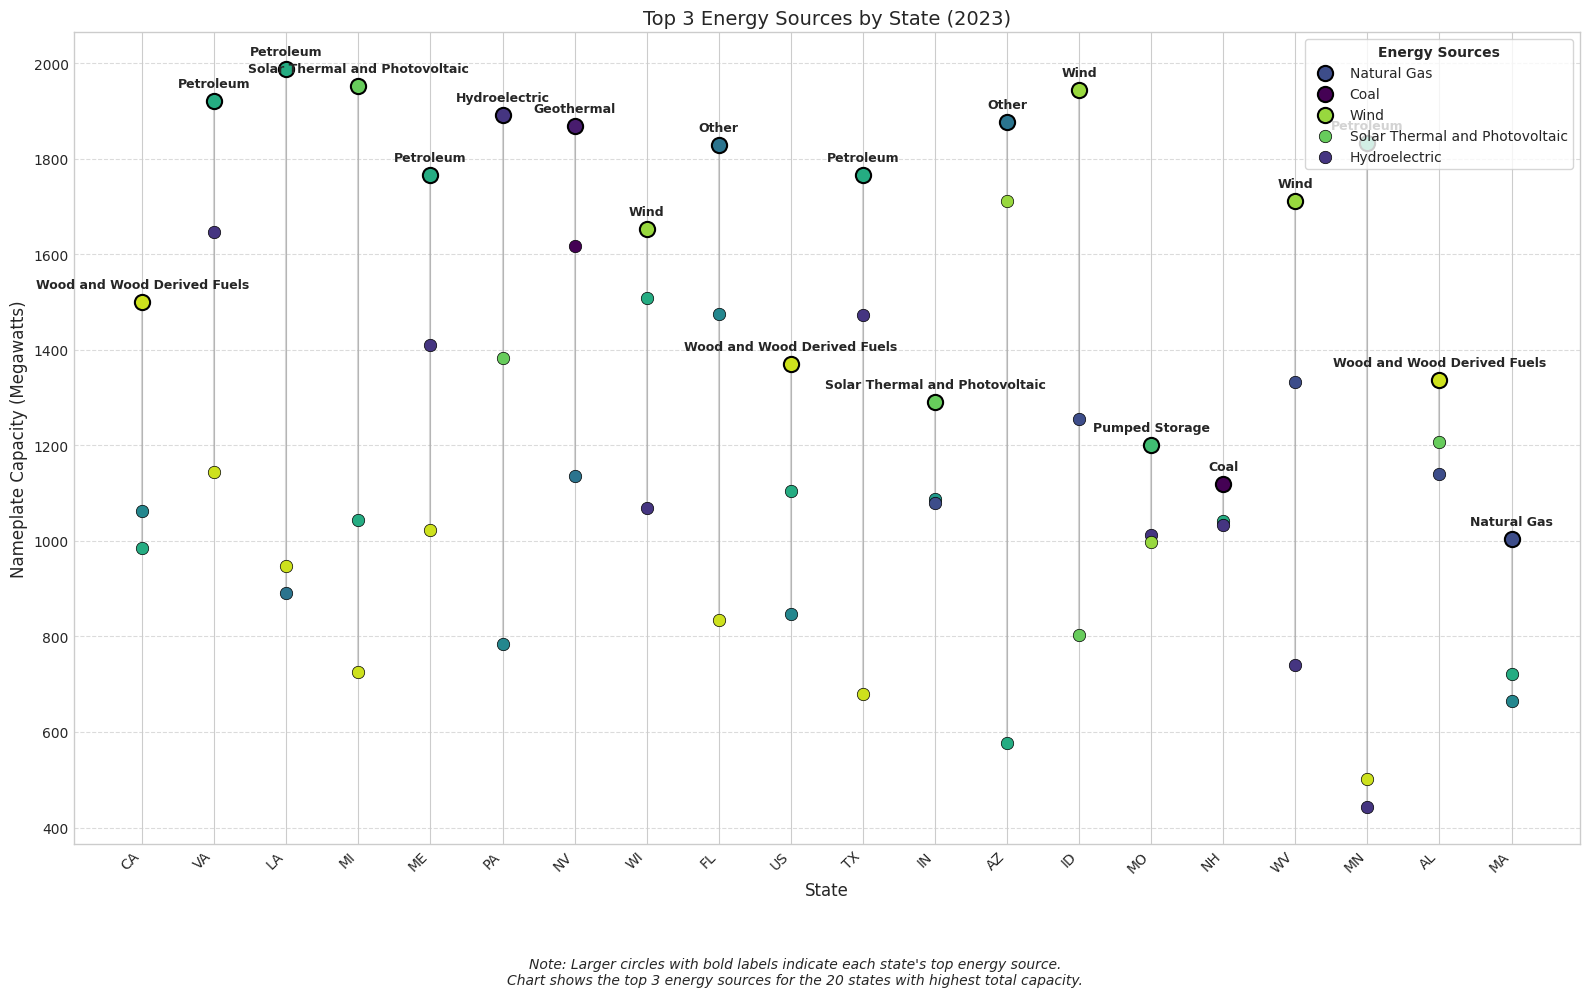

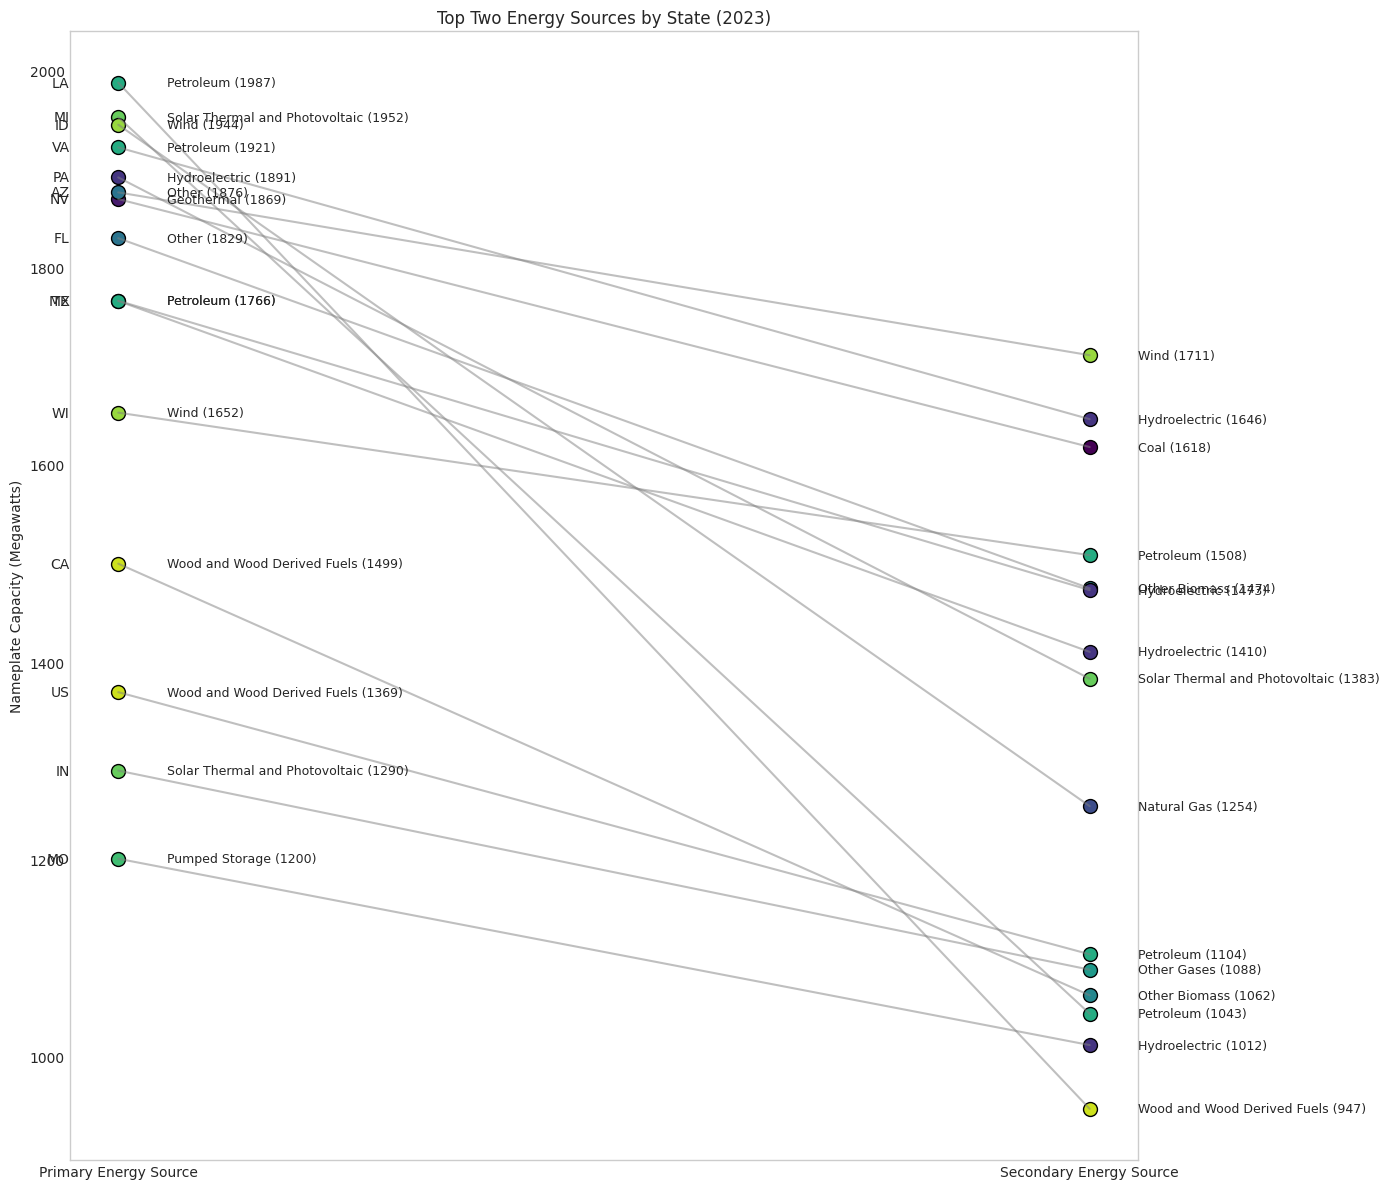

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Load the data
df = pd.read_csv('StateEnergyData.csv', skiprows=1)

# Clean the column names
df.columns = df.columns.str.strip()

# Convert numeric columns
df['Nameplate_Capacity_(Megawatts)'] = pd.to_numeric(df['Nameplate_Capacity_(Megawatts)'], errors='coerce')
df['Summer_Capacity_(Megawatts)'] = pd.to_numeric(df['Summer_Capacity_(Megawatts)'], errors='coerce')

# Filter out 'All Sources' to avoid double-counting
df = df[df['FuelSource'] != 'All Sources']

# Use the most recent year for analysis
recent_year = df['Year'].max()
recent_data = df[df['Year'] == recent_year]

# Group by state and fuel source, summing capacity
state_energy = recent_data.groupby(['State', 'FuelSource'])['Nameplate_Capacity_(Megawatts)'].sum().reset_index()

# Find the top energy source for each state
top_sources_by_state = state_energy.sort_values(['State', 'Nameplate_Capacity_(Megawatts)'], ascending=[True, False])
top_source_per_state = top_sources_by_state.groupby('State').first().reset_index()

# Get the top 20 states by total energy capacity
total_capacity_by_state = state_energy.groupby('State')['Nameplate_Capacity_(Megawatts)'].sum().sort_values(ascending=False)
top_states = total_capacity_by_state.head(20).index

# Filter data to top states
state_energy_top = state_energy[state_energy['State'].isin(top_states)]

# Get the top 3 energy sources for each state
top_n = 3
top_sources_per_state = (state_energy_top.sort_values(['State', 'Nameplate_Capacity_(Megawatts)'], ascending=[True, False])
                         .groupby('State').head(top_n))

# Create a connected scatter plot highlighting the top energy sources by state
plt.figure(figsize=(16, 10))

# Get all unique fuel sources and assign colors
all_sources = df['FuelSource'].unique()
all_sources = np.sort([s for s in all_sources if s is not None])
colors = plt.cm.viridis(np.linspace(0, 1, len(all_sources)))
color_map = dict(zip(all_sources, colors))

# Define the common sources to show in the legend
common_sources = ['Natural Gas', 'Coal', 'Nuclear', 'Wind', 'Solar Thermal and Photovoltaic', 'Hydroelectric']
common_sources = [s for s in common_sources if s in all_sources]

# Plot data
for i, state in enumerate(top_states):
    state_data = top_sources_per_state[top_sources_per_state['State'] == state].sort_values('Nameplate_Capacity_(Megawatts)', ascending=False)
    
    # Plot line connecting points for this state
    plt.plot([i] * len(state_data), 
             state_data['Nameplate_Capacity_(Megawatts)'], 
             'o-', 
             color='gray', 
             alpha=0.3, 
             linewidth=1.5)
    
    # Plot individual points with colors based on fuel source
    for _, row in state_data.iterrows():
        source = row['FuelSource']
        capacity = row['Nameplate_Capacity_(Megawatts)']
        
        # Use larger markers for the top source
        is_top_source = (source == top_source_per_state[top_source_per_state['State'] == state]['FuelSource'].iloc[0])
        marker_size = 120 if is_top_source else 80
        edge_width = 1.5 if is_top_source else 0.5
        
        plt.scatter(i, capacity, 
                   s=marker_size, 
                   color=color_map[source], 
                   edgecolor='black', 
                   linewidth=edge_width, 
                   zorder=3, 
                   label=source if source in common_sources else None)
        
        # Add annotation for top source only
        if is_top_source:
            plt.annotate(source, 
                        (i, capacity), 
                        xytext=(0, 10), 
                        textcoords='offset points',
                        ha='center', 
                        fontsize=9, 
                        fontweight='bold')

# Customize the plot
plt.xticks(range(len(top_states)), top_states, rotation=45, ha='right')
plt.xlabel('State', fontsize=12)
plt.ylabel('Nameplate Capacity (Megawatts)', fontsize=12)
plt.title(f'Top {top_n} Energy Sources by State ({recent_year})', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Create legend without duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
filtered_items = {k: by_label[k] for k in common_sources if k in by_label}
legend = plt.legend(filtered_items.values(), filtered_items.keys(), 
                    title="Energy Sources", 
                    loc='upper right', 
                    frameon=True, 
                    fontsize=10)
legend.get_title().set_fontweight('bold')

# Add explanation text
plt.figtext(0.5, 0.01, 
            "Note: Larger circles with bold labels indicate each state's top energy source.\n" +
            f"Chart shows the top {top_n} energy sources for the {len(top_states)} states with highest total capacity.", 
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig('top_energy_sources_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

# Alternative visualization: Slope graph for top and second energy sources by state
plt.figure(figsize=(14, 12))

# Select only top 15 states for cleaner visualization
top_15_states = total_capacity_by_state.head(15).index
top_2_sources = (state_energy[state_energy['State'].isin(top_15_states)]
                .sort_values(['State', 'Nameplate_Capacity_(Megawatts)'], ascending=[True, False])
                .groupby('State').head(2))

# Create a slope graph
for state in top_15_states:
    state_data = top_2_sources[top_2_sources['State'] == state]
    
    if len(state_data) >= 2:  # Ensure state has at least 2 sources
        top_source = state_data.iloc[0]
        second_source = state_data.iloc[1]
        
        plt.plot([0, 1], 
                [top_source['Nameplate_Capacity_(Megawatts)'], second_source['Nameplate_Capacity_(Megawatts)']],
                '-', 
                color='gray', 
                alpha=0.5, 
                linewidth=1.5)
        
        # Plot top source point
        plt.scatter(0, top_source['Nameplate_Capacity_(Megawatts)'], 
                   s=100, 
                   color=color_map[top_source['FuelSource']], 
                   edgecolor='black', 
                   linewidth=1)
        
        # Plot second source point
        plt.scatter(1, second_source['Nameplate_Capacity_(Megawatts)'], 
                   s=100, 
                   color=color_map[second_source['FuelSource']], 
                   edgecolor='black', 
                   linewidth=1)
        
        # Annotate state name on the left
        plt.text(-0.05, top_source['Nameplate_Capacity_(Megawatts)'], 
                state, 
                ha='right', 
                va='center', 
                fontsize=10)
        
        # Annotate top source name and capacity
        plt.text(0.05, top_source['Nameplate_Capacity_(Megawatts)'], 
                f"{top_source['FuelSource']} ({int(top_source['Nameplate_Capacity_(Megawatts)'])})", 
                ha='left', 
                va='center', 
                fontsize=9)
        
        # Annotate second source name and capacity
        plt.text(1.05, second_source['Nameplate_Capacity_(Megawatts)'], 
                f"{second_source['FuelSource']} ({int(second_source['Nameplate_Capacity_(Megawatts)'])})", 
                ha='left', 
                va='center', 
                fontsize=9)

# Set labels and title
plt.xticks([0, 1], ['Primary Energy Source', 'Secondary Energy Source'])
plt.ylabel('Nameplate Capacity (Megawatts)')
plt.title(f'Top Two Energy Sources by State ({recent_year})')
plt.grid(False)
plt.tight_layout()
plt.savefig('top_two_energy_sources_slope.png', dpi=300, bbox_inches='tight')
plt.show()